In [ ]:
import matplotlib.pyplot as plt
from utils import SimpleMarkovChainQueueModel, PoissonProcess
import seaborn as sns
import numpy as np

In [2]:
arrival_rate = 100
service_rate = 500
queue_size = 100

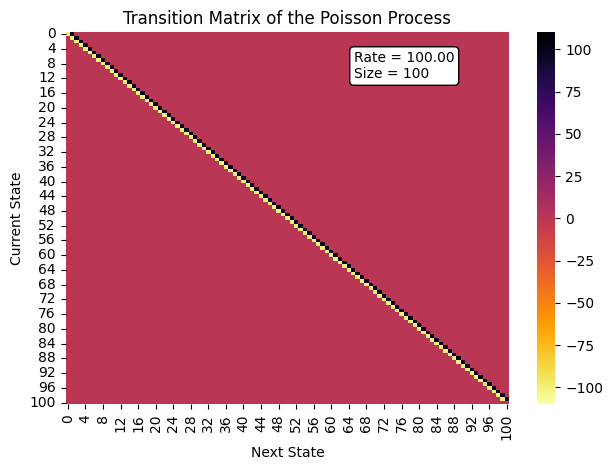

In [3]:
poisson_process = PoissonProcess(arrival_rate, queue_size)
fig, ax = plt.subplots()
sns.heatmap(poisson_process.rate_matrix,
            annot=False,
            cmap='inferno_r',
            fmt=".2f",
            ax=ax,
            vmin=-arrival_rate*1.1, vmax=arrival_rate*1.1)
textstr = (
    f'Rate = {poisson_process.rate:.2f}\n'
    f'Size = {poisson_process.size}'
)
ax.text(0.65, 0.95,
        textstr,
        transform=ax.transAxes,
        verticalalignment='top',
        bbox=dict(
            boxstyle='round', facecolor='white'
        ))
ax.set_title('Transition Matrix of the Poisson Process')
ax.set_ylabel('Current State')
ax.set_xlabel('Next State')
fig.tight_layout()

In [4]:
queue_model = SimpleMarkovChainQueueModel(
    arrival_rate=arrival_rate,
    service_rate=service_rate,
    size=queue_size,
)

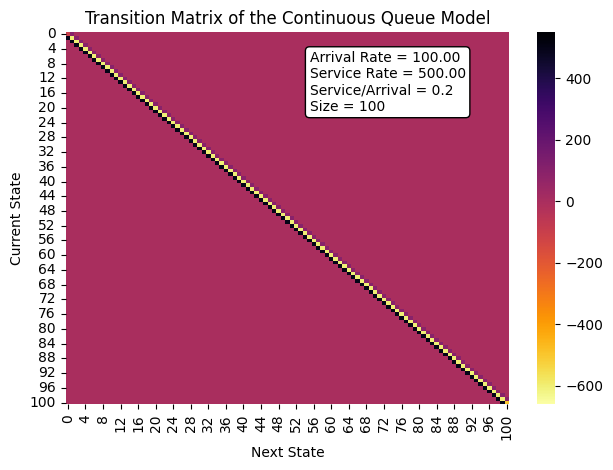

In [5]:
fig, ax = plt.subplots()
sns.heatmap(queue_model.rate_matrix,
            annot=False,
            cmap='inferno_r',
            fmt=".2f",
            ax=ax,
            vmin=-1.1*(queue_model.service_rate + queue_model.arrival_rate),
            vmax=1.1*max(queue_model.service_rate, queue_model.arrival_rate))
ax.set_title('Transition Matrix of the Continuous Queue Model')
textstr = (
    f'Arrival Rate = {queue_model.arrival_rate:.2f}\n'
    f'Service Rate = {queue_model.service_rate:.2f}\n'
    f'Service/Arrival = {queue_model.arrival_service}\n'
    f'Size = {queue_model.size}'
)
ax.text(0.55, 0.95,
        textstr,
        transform=ax.transAxes,
        verticalalignment='top',
        bbox=dict(
            boxstyle='round', facecolor='white'
        ))
ax.set_ylabel('Current State')
ax.set_xlabel('Next State')
fig.tight_layout()

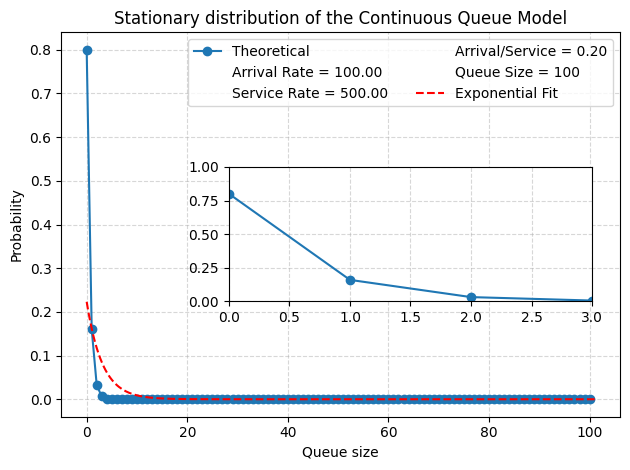

In [ ]:
def plot_ax(ax):
    ax.grid(linestyle='--', alpha=.5)
    ax.plot(queue_model.stationary_distribution, marker='o', label='Theoretical')
    # ax.plot(queue_model.eigenvalues_report.stationary_distribution, marker='x', label='Eigenvector')
    # ax.plot(queue_model.lstsq_report.stationary_distribution, marker='+', label='LSTSQ')


fig, ax = plt.subplots()
plot_ax(ax)
ax.plot([], [], ' ', label=f'Arrival Rate = {queue_model.arrival_rate:.2f}')
ax.plot([], [], ' ', label=f'Service Rate = {queue_model.service_rate:.2f}')
ax.plot([], [], ' ', label=f'Arrival/Service = {queue_model.arrival_service:.2f}')
ax.plot([], [], ' ', label=f'Queue Size = {queue_model.size}')
zoom_ax = ax.inset_axes(
    [.3, 0.3, .65, 0.35],
    xlim=(0, 3), ylim=(0, 1)
)
plot_ax(zoom_ax)
ax.set(
    xlabel='Queue size',
    ylabel='Probability',
    title='Stationary distribution of the Continuous Queue Model',
)
ax.legend(ncol=2)
fig.tight_layout()